# Project Scope

While the primary risk factors for heart disease — hypertension, hypercholesterolemia, and hyperglycemia — are well-established, this project shifts the focus from causes to consequences.

We aim to explore **how heart disease manifests functionally in the heart**, using key physiological and diagnostic indicators:

- **ST-segment depression during exercise** as a proxy for ischemia and impaired blood flow.
- **Maximum heart rate achieved during exercise**, hypothesizing lower peaks in patients with underlying cardiomyopathy or impaired cardiac output.

By correlating these metrics, we hope to highlight the clinical signatures of cardiac dysfunction in at-risk populations and evaluate whether these features can be predictive of heart disease outcomes.

In [ ]:
# import libraries
%pip install matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# define path to the data file
heart_failure_path = '../data/heart_disease_uci_cleaned.csv'
# read the data
try:
    heart_failure = pd.read_csv(heart_failure_path, sep=',')

    print(f"Successfully loaded CSV file: {heart_failure_path}")
    print(f"Loaded CSV shape: {heart_failure.shape}")
    print(f"CSV columns found: {heart_failure.columns.tolist()}")
except FileNotFoundError:
    print(f"ERROR: CSV file not found at path: {heart_failure_path}")
    print("Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")
    print("Please check the file and try again.")

Note: you may need to restart the kernel to use updated packages.
Successfully loaded CSV file: ../data/heart_disease_uci_cleaned.csv
Loaded CSV shape: (299, 16)
CSV columns found: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


### Pathological background

The heart is a vital muscular organ, and the core component of the cardiovascular system, responsible for circulating blood throughout the body to deliver oxygen and nutrients while simultaneously transporting waste to the appropriate organs. The heart is broken up into four sections: right atrium, right ventricle, left atrium. left ventricle. Deoxygenated blood passes through the right side of the heart, passing from atrium to ventricle, then to the lungs through the pulmonary artery. Oxygenated blood then flows back into the heart via the pulmonary vein, and flows into the left atrium, then the left ventricle, where it will then circulate to the body.

The heart is made up of cardiac muscle and contracts when electrical signals are passed through the muscle. The electrical signal starts in upper right side of the heart (the sino-atrial node) and passes down the muscle (the intraventricular septum) splitting the left and right side of the heart. When it gets to the bottom of the heart (the apex), it then passes back up the walls of the heart in 360 degrees. After the electrical signal has finished its run, the heart then repolarizes, or recharges, and resets the heart for the next cycle.

Electrocardiograms, or EKGs, read the electrical signals that pass through the heart. Deviations in normal EKG readings can show a myriad of conditions, such as ischemia, which is an area of poorly oxygenated muscle tissue. When the heart muscle is poorly oxygenated, electrical signals will either slow down or pass around the dying tissue. Cardiomyopathy is the pathological thickening of cardiac tissue. When the cardiac muscle thickens, it becomes increasingly difficult to pump blood out efficiently (known as cardiac output). This is due to several factors, such as decreased volume in the ventricles of the heart for the blood to flow into, or decreased ventricular space for the heart muscle to contract into. When the ability to pump blood out of the heart decreases, the whole body, including the heart, will then begin to lose availability to oxygen-rich blood. This in turn induces a negative cycle, where heart tissue becomes weakened, or in some cases dies, due to lack of blood flow, and therefore cardiac output continues to decrease. 

The data presented in the UCI Heart Disease data repository [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records) includes physiological measurements associated with exercise by means of stress testing. We will explore three separate cardiac manifestations of heart disease: ST-segment depression, maximum heart rate achieved during stress testing, and exercise induced angina. During each exploration, we will consider how other variables play a role in the manifestation of these cardiac events as well.

### ST-Segment depression during exercise

The ST-segment is a portion of the EKG that represents the ventricles, both left and right, repolarizing. This is right after the ventricles have contracted, and are "recharging" back to their normal state before the next cardiac cycle. Normally, this is a flat line between the end of the "QRS" complex and the beginning of the T wave. Elevation or depression of this flat line is a strong indicator of cardiac issues such as myocardial ischemia. Recall that patients with cardiomyopathy could have ischemic cardiac tissue, and therefore we should see ST-segment depression. 

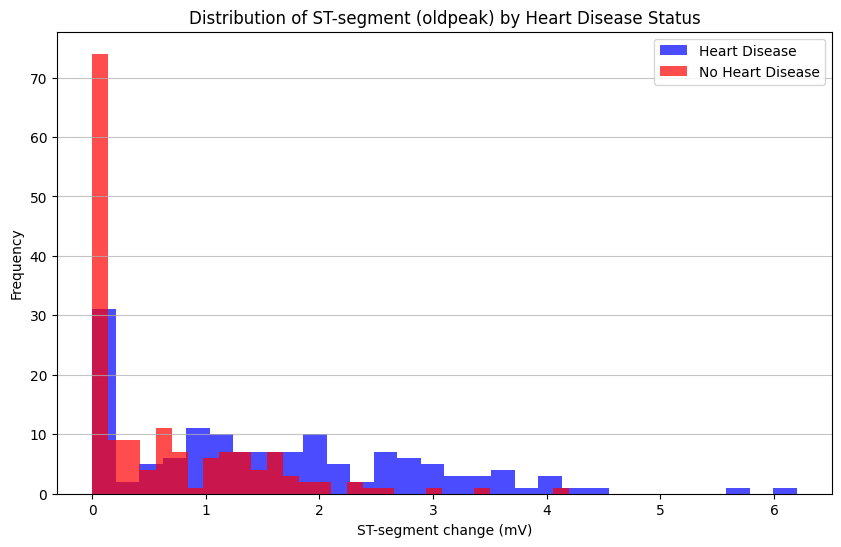

In [4]:
# Exploring the relationship between ST-segment and target variable
has_heart_disease = heart_failure['oldpeak'][heart_failure['num'] == 1]
no_heart_disease = heart_failure['oldpeak'][heart_failure['num'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(has_heart_disease, color='blue', alpha=0.7, bins=30, label='Heart Disease')
plt.hist(no_heart_disease, color='red', alpha=0.7, bins=30, label='No Heart Disease')
plt.title('Distribution of ST-segment (oldpeak) by Heart Disease Status')
plt.xlabel('ST-segment change (mV)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

While both patients with and without heart disease have a strong right-skew, patients with heart disease comprise of 2 outliers, with a change of ~6mV ST-segment depression. While there are a subset of patients without heart disease that do have ST-segment depression, a greater concentration of patients with heart disease have ST-segment depression. Additionally, almost 2-times as many patients without heart disease have no ST-segment depression compared to patients with heart disease. The next step is to look at these through a box plot, which looks at the median, and quartile values of continuous data (ST-segment magnitude) grouped by categorical data (heart disease status).

/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_52396/88500769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='oldpeak', data=heart_failure, palette='Set1')


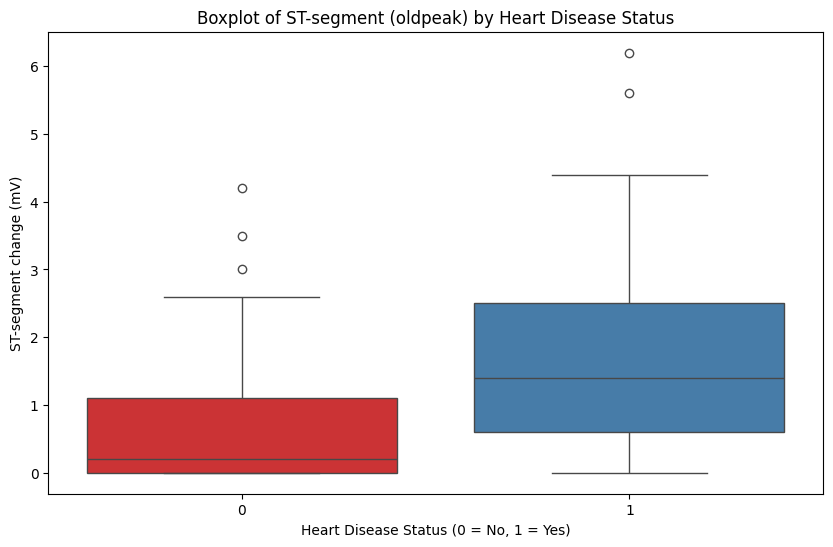

In [5]:
# Exploring the relationship between ST-segment and target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='oldpeak', data=heart_failure, palette='Set1')
plt.title('Boxplot of ST-segment (oldpeak) by Heart Disease Status')
plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)')
plt.ylabel('ST-segment change (mV)')
plt.show()


The boxplot above provides additional evidence that patients with heart disease have a higher ST-segment than patients without heart disease. However, there are a few outliers for both groups. While it is important to note that not all ST-segment elevation and depressions are pathological, we should explore this further. If we were to try to model this, we would need to understand if there were some extranuous factors that were contributing to these outliers we are seeing. Hypertension (high blood pressure), hypercholesterolemia (high cholesterol), hyperglycemia (high blood sugar), and age could contribute to ST-segment depression. Additionally, to understand the baseline of each patient cohort, we should look at ST-segment depression compared to resting ECG. Let's explore further.

/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_52396/1128976712.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_oldpeak = heart_failure.groupby('age_bin')['oldpeak'].mean()


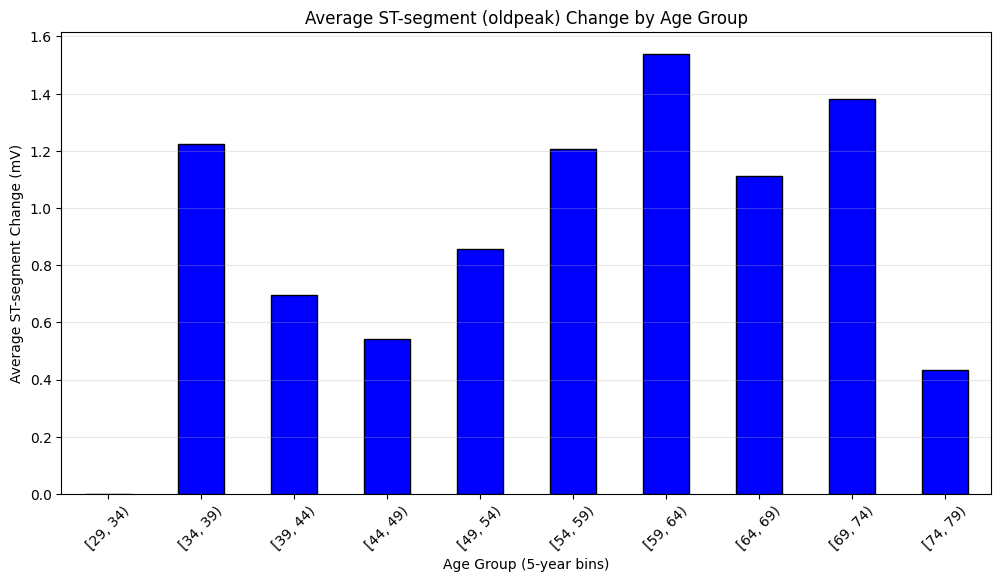

In [6]:
# Explore age and oldpeak relationship in heart failure dataset
# Create age bins with a step of 5 years
bins = range(int(heart_failure['age'].min()), int(heart_failure['age'].max()) + 5, 5)
heart_failure['age_bin'] = pd.cut(heart_failure['age'], bins=bins, right=False)

# Group by age bins and calculate the mean oldpeak for each bin
age_bin_oldpeak = heart_failure.groupby('age_bin')['oldpeak'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
age_bin_oldpeak.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average ST-segment (oldpeak) Change by Age Group')
plt.xlabel('Age Group (5-year bins)')
plt.ylabel('Average ST-segment Change (mV)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

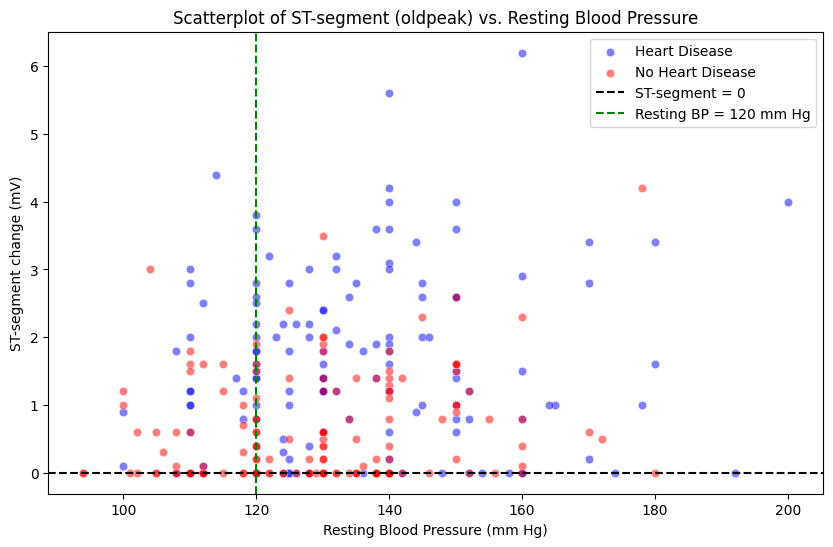

In [7]:
# Explore the relationship between hypertension and ST-segment depression
plt.figure(figsize=(10, 6))

# Create DataFrames for heart disease and no heart disease groups
has_heart_disease_df = heart_failure[heart_failure['num'] == 1][['trestbps', 'oldpeak']]
no_heart_disease_df = heart_failure[heart_failure['num'] == 0][['trestbps', 'oldpeak']]

# Plot the scatterplots
sns.scatterplot(x='trestbps', y='oldpeak', data=has_heart_disease_df, color='blue', label='Heart Disease', alpha=0.5)
sns.scatterplot(x='trestbps', y='oldpeak', data=no_heart_disease_df, color='red', label='No Heart Disease', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', label='ST-segment = 0')
plt.axvline(x=120, color='green', linestyle='--', label='Resting BP = 120 mm Hg')
plt.title('Scatterplot of ST-segment (oldpeak) vs. Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('ST-segment change (mV)')
plt.legend()
plt.show()

Because the scales are drastically different, it is difficult to determine whether there is any relationship. Let's rescale and center the data for both ST-segment change and resting blood pressure to get the features on the same scale.

/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_10772/2411225008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fbs', y='oldpeak', data=heart_failure, palette='Set1')
/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_10772/2411225008.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


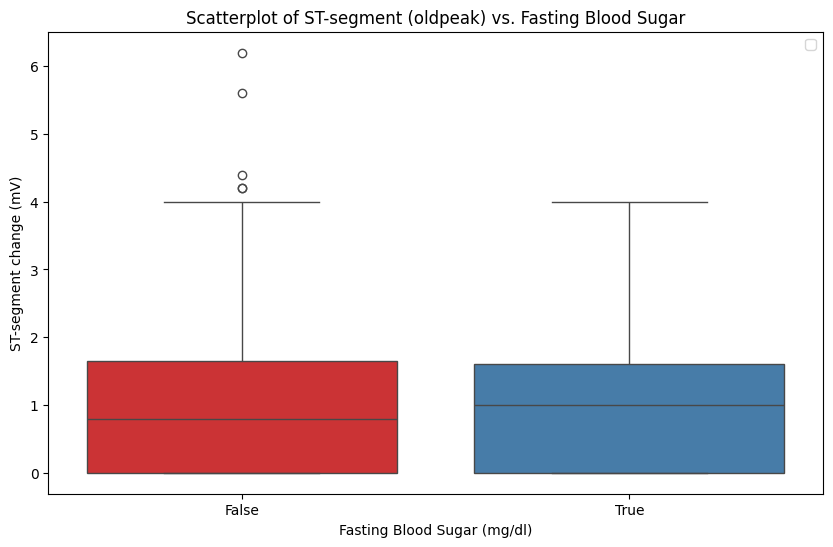

In [31]:
# Explore the relationship between hyperglycemia and ST-segment depression
plt.figure(figsize=(10, 6))

# Plot the scatterplots
sns.boxplot(x='fbs', y='oldpeak', data=heart_failure, palette='Set1')
plt.title('Scatterplot of ST-segment (oldpeak) vs. Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (mg/dl)')
plt.ylabel('ST-segment change (mV)')
plt.legend()
plt.show()

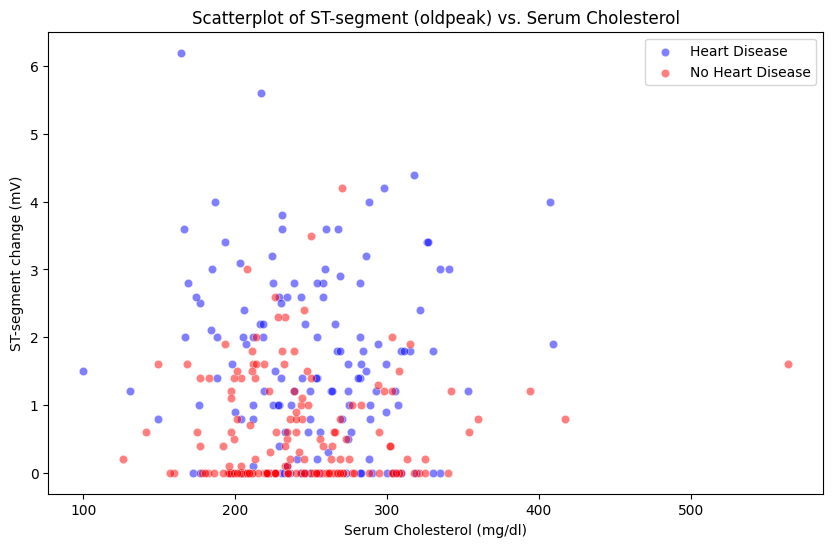

In [29]:
# Explore the relationship between hypercholesterolemia and ST-segment depression
plt.figure(figsize=(10, 6))

# Create DataFrames for heart disease and no heart disease groups
has_heart_disease_df = heart_failure[heart_failure['num'] == 1][['chol', 'oldpeak']]
no_heart_disease_df = heart_failure[heart_failure['num'] == 0][['chol', 'oldpeak']]
# Plot the scatterplots
sns.scatterplot(x='chol', y='oldpeak', data=has_heart_disease_df, color='blue', label='Heart Disease', alpha=0.5)
sns.scatterplot(x='chol', y='oldpeak', data=no_heart_disease_df, color='red', label='No Heart Disease', alpha=0.5)
plt.title('Scatterplot of ST-segment (oldpeak) vs. Serum Cholesterol')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('ST-segment change (mV)')
plt.legend()
plt.show()

/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_10772/1336211749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='restecg', y='oldpeak', data=heart_failure, palette='Set1')
/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_10772/1336211749.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


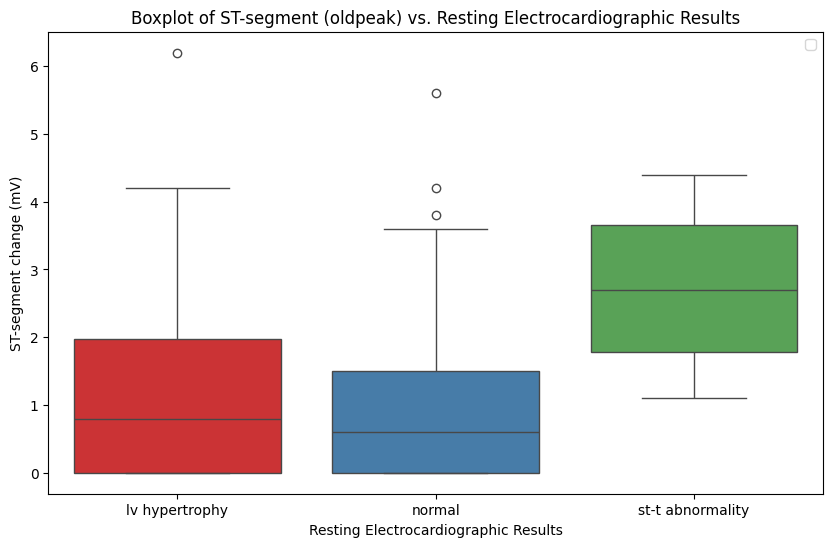

In [32]:
# Explore the relationship between resting ECG and ST-segment depression
plt.figure(figsize=(10, 6))

# Plot the boxplots
sns.boxplot(x='restecg', y='oldpeak', data=heart_failure, palette='Set1')
plt.title('Boxplot of ST-segment (oldpeak) vs. Resting Electrocardiographic Results')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('ST-segment change (mV)')
plt.legend()
plt.show()

### Results of ST-segment data exploration

We looked at the relationship of age, hypercholesterolemia, hypertension, hyperglycemia and resting ECG status on ST-segment depression. It is important to call out confounding variables at the start of this analysis. Confounding variables are when there is influence from variables that are not directly being observed when exploring data. For example, when looking at the relationship between age and ST-segment depression, there are many factors that play a role into this. As you age, your systolic blood pressure (when your heart contracts) increases, your insulin sensitivity (contributing to diabetes) decreases, and your cholesterol levels will begin to favor the "bad" cholesterol more. This is all natural, and these three factors are the major risk factors for developing heart disease. So while the relationship was pretty inconclusive, higher ST-segment depression in older adults could be a result of these biological processes.

When looking at the relationship between the three major risk factors and ST-segment depression, interestingly there is no difference in ST-segment depression in patients with high fasting blood glucose and those without. High fasting blood glucose is defined as a blood glucose level >126 mg/dL or higher in two separate tests, and high blood sugar contributes to arteriosclerosis, or hardening of the arteries. Arteries are inherintly elastic, but over time will harden. When they harden, the systemic pressure acting on the heart pumping out the blood increases. To compensate for this, the heart must contract harder, which in turn can lead to hypertension. This is another reason why age is associated with high blood pressure. 

Hypertension, or high blood pressure, is defined as having a blood pressure of 140/90 or higher. The relationship between hypertension and ST-segment depression shows that patients with heart disease tend to have high blood pressure, which is supportive of the vast amount of evidence prior to this data exploration. When looking at the scatter plot, it is difficult to determine the correlation between hypertension and ST-segment depression, however upon first glance it appears there is a slight positive correlation.

Hypercholesterolemia, or high serum cholesterol, is defined as total cholesterol levels of 200 mg/dL or higher, and contributes to atherosclerosis, which is the build-up of plaque and fat on the blood vessel walls. No relationship is apparent between ST-segment depression and hypercholesterolemia.

It is important to note that whilee atherosclerosis contributes to arteriosclerosis, they are not the same. Atherosclerosis is typically important in the coronary arteries, or blood vessels surrounding the heart. Atherosclerosis is a leading factor of cardiac ischemia. Arteriosclerosis, on the other hand, refers to systemic arteries. This could explain the slight correlation we see between ST-segment depression and hypertension, as arteriosclerosis is a broader condition that effects the body's circulatory system, while atherosclerosis typically effects the coronary arteries. 

Lastly, we explored the relationship between ST-segment depression and resting ECG results. Resting ECG results were reported in ordinal variables 1-3, representing normal ECG, ST-T abnormality and left ventricular hypertrophy, respectively. Resting ECG status of ST-T abnormality was defined as having specific inversions or ST-segment elevation or depression of >0.05 mV at rest. Left ventricular hypertrophy, which is a clinical indicator of cardiomyopathy, was diagnosed using specific criteria. Our goal was to determine the reason for patients who did not present with heart disease but had high ST-depression. Upon observation, we can see that there were patients with normal resting ECG results that had high ST-segment changes. We can assume that the patients who were not diagnosed with heart disease that had high ST-segment depression is non-pathological. 


### Maximum heart rate achieved during exercise

Cardiac output is the volume of blood pumped by the heart in one minute, and is calculated by the stroke volume (SV), or the amount of blood ejected from the heart each contraction, times the heart rate, how many times the heart beats per minute. Stroke volume and heart rate have an inverse relationship, where if one decreases, the other will increase to try to maintain normal cardiac output as determined by the body. During exercise, the heart must beat faster in order to circulate oxygen to high-demand tissues, such as the muscles, and remove the waste that is building up as a result of aerobic metabolism. When the heart beats faster, there is less time for blood to fill the ventricles, resulting in less stroke volume being ejected each contraction. 

Our second aim seeks to understand the relationship between maximum heart rate and the presence of heart disease. With this exploration again presents the confounding variable of age. Two patients who are 20 years apart are expected to have a difference of 20 beats per minute, which could influence our results. Therefore, we will first explore the relationship between heart disease and maximum heart rate, then take into consideration age as a factor in determining max heart rate to see the influence this has on our maximum heart rate.

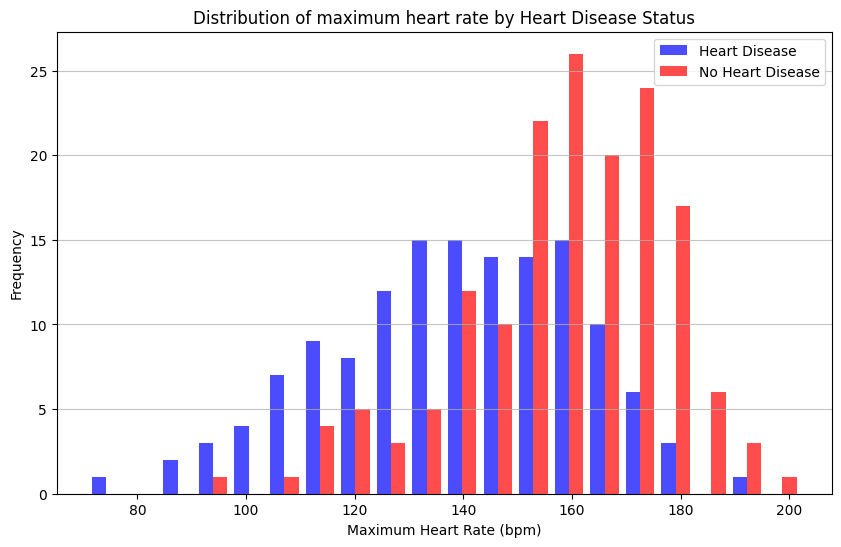

In [46]:
# Initial data exploration of the distribution of maximum heart rate across disease status
has_heart_disease = heart_failure['thalch'][heart_failure['num'] == 1]
no_heart_disease = heart_failure['thalch'][heart_failure['num'] == 0]

plt.figure(figsize=(10, 6))
plt.hist([has_heart_disease, no_heart_disease], color=['blue', 'red'], alpha=0.7, bins=20, label=['Heart Disease', 'No Heart Disease'])
plt.title('Distribution of maximum heart rate by Heart Disease Status')
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Initial distribution of the data shows that patients without heart disease have higher maximum heart rates during exercise, showing an improved compensatory mechanism to maintain adequate cardiac output during exercise. Both datasets are normally distributed, with a slight left skew for both. We will now look to compare these through box plots and side-by-side bar charts.

/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_10772/3864199242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='thalch', data=heart_failure, palette='Set1')


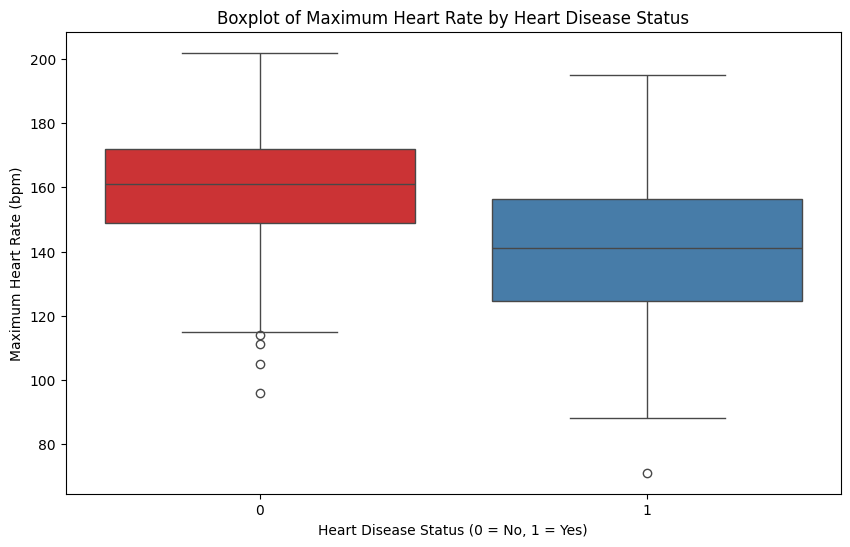

In [40]:
# Explore the relationship between maximum heart rate and heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='thalch', data=heart_failure, palette='Set1')
plt.title('Boxplot of Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.show()



/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_10772/1597743438.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_max_heart_rate = heart_failure.groupby(['age_bins', 'num'])['thalch'].mean().reset_index()


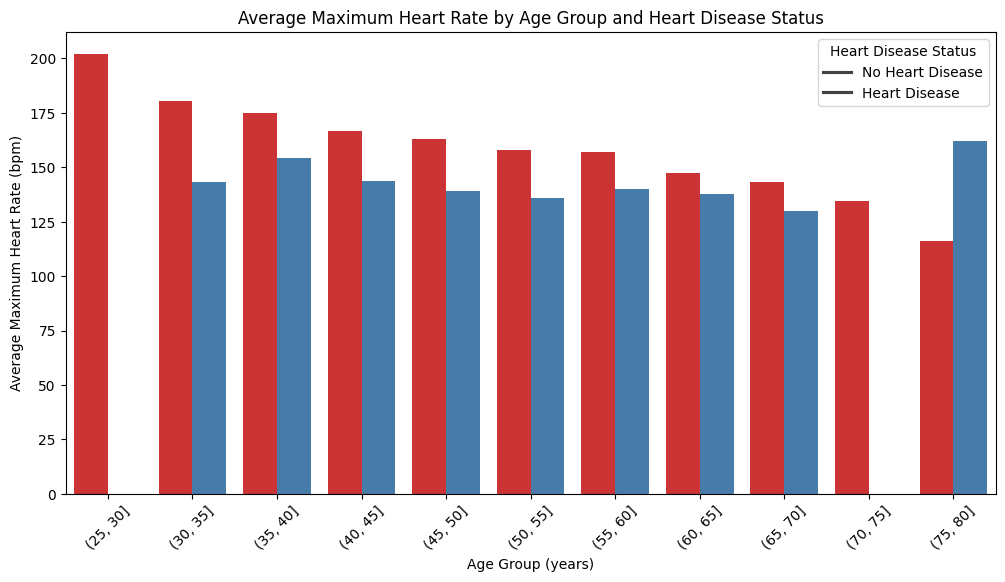

In [55]:
# Explore the impact age has on maximum heart rate in patients with heart disease
# Bin ages into 5-year groups
heart_failure['age_bins'] = pd.cut(heart_failure['age'], bins=range(25, 85, 5))

# Group by age bin and disease status, then compute mean heart rate
age_max_heart_rate = heart_failure.groupby(['age_bins', 'num'])['thalch'].mean().reset_index()

# Plot the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='age_bins', y='thalch', hue='num', data=age_max_heart_rate, palette='Set1')
plt.title('Average Maximum Heart Rate by Age Group and Heart Disease Status')
plt.xlabel('Age Group (years)')
plt.ylabel('Average Maximum Heart Rate (bpm)')
plt.legend(title='Heart Disease Status', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=45)
plt.show()

Upon observation, patients with heart disease seem to have lower maximum heart rate compared to those without. While cardiac output does decrease when there is presence of cardiomyopathy, it appears that the compensatory mechanism for maintaining adequate cardiac output seems to be hindered by the pathology. As seen with the ECG observation above, we know that there is electrical abnormality in patients with cardiomyopathy, and the cardiac cycle is highly dependent on the rhythm of the SA node. Increased muscular thickening could contribute to a decrease in the current of the signal as it passes through the cardiac tissue, from the sinoatrial node to the atrioventricular node, down the intraventricular branch, to the apex and into the perkunje fibers. Additionally, exacerbated repolarization of the ventricles, as seen above, could lead to the delay of SA initiation of the next cardiac cycle.

Interestingly, the pathology of heart disease on maximum heart rate seems to counter the impact of age. We can see in our "Average Maximum Hear Rate by Age Group and Heart Disease Status" graph that patients with no heart disease see a general decrease in maximum heart rate as age increases. Patients with heart disease, however, have impaired maximum heart rate seen at even earlier ages of disease onset. For individuals 30-35 years old, the maximum heart rate observed should be between 185-190 beats per minute, however the average heart rate of a 30-35 year old patient with heart disease was below 150. This further provides evidence that the pathological thickening of the myocardial tissue not only decreases the stroke volume, but impairs the compensatory mechanism of increasing heart rate to keep up with cardiac output.

### Final observations

In this notebook, we examined the impact of cardiomyopathy on cardiac function. The heart can be thought of as having two separate components: a pump that circulates blood, and an electrical board that controls the pump. Interstitial junctions, or channels between cardiac cells, are directly responsible for the flow of ions that induce action potentials for the cardiac cells to contract. We are able to measure these action potentials via EKGs. As the electrical signal passes through the cardiac tissue, the muscle will contract and this leads to the heart pumping blood out to the body. Cardiomyopathy, the pathological thickening of cardiac tissue, effects both the pump and the electrical board components of the heart. 

Cardiomyopathy is shown to depress the ST-segment of an EKG, a segment that represents repolarization of the ventricles during the cardiac cycle. We examined and ruled out the influence of confounding variables, such as hyperglycemia, hypercholesterolemia, and hypertension, on ST-segment depression, and compared resting ECG to the ST-segment depression data. This data showed that a few outliers we had for patients with a large magnitude of ST-segment depression and no presence of heart disease were categorized as "normal" during initial ECG measurement, leading us to believe that these outliers were not pathological. However, this does not mean that this could not be a premature indication of early-progress cardiomyopathy. This would require further exploration. 

When examining maximum heart rate, also dependent on the hearts circuit board capability, we saw that patients with heart disease had lower maximum heart rates compared to those patients without heart disease. According to the equation for cardiac output, stroke volume and heart rate are inversely related, and a decrease or increase in one will trigger an increase or decrease in the other, respectively, to maintain cardiac output. Knowing that age directly influences maximum heart rate, we looked at age as a confounding variable for maximum heart rate and heart disease status. Patients without heart disease showed the expected decrease in maximum heart rate as age increased. However, patients with cardiomyopathy had decreased cardiac function at all ages, and no trend in maximum heart rate was observed as seen in patients without heart disease. This indicates that regardless of age, cardiomyopathy plays a significant role in decreasing compensatory mechanisms of cardiac tissue to maintain cardiac output. 

Next, we will test the above observations statistically using a variety of statistical methods, and draw formal conclusions to finalize this project.